<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/xuat_duoc_anh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 


In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import efficientnet.tfkeras as efn  # Convolutional Neural Network architecture
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from efficientnet.keras import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

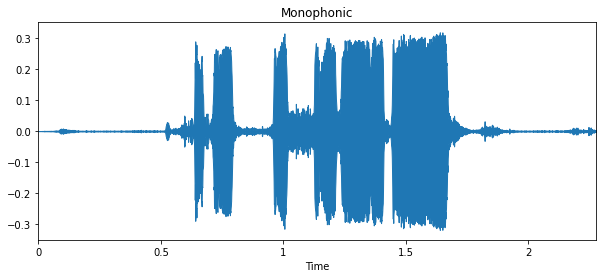

In [14]:
SOUND_DIR = "../content/drive/MyDrive/data/wav/test/1.CAT/B_ANI01_MC_FN_SIM01_101.wav"
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR))

# load the mp3 file
signal, sr = librosa.load(SOUND_DIR, duration=10)  # sr = sampling rate

# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title("Monophonic")
plt.savefig('../content/drive/MyDrive/data/test/1.CAT/1.png', bbox_inches='tight')
plt.show()

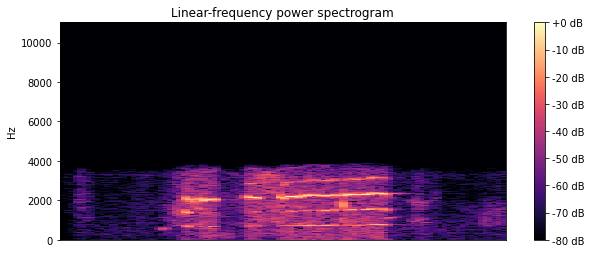

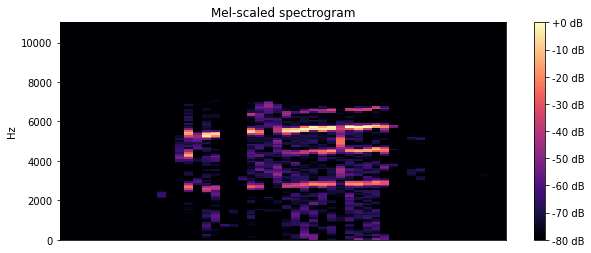

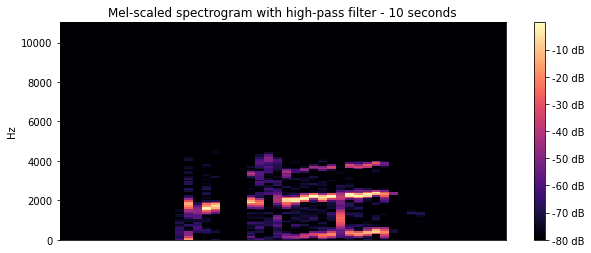

In [13]:
import cv2
import glob
import numpy as np

# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis="linear")
plt.colorbar(format="%+2.0f dB")
plt.title("Linear-frequency power spectrogram")
plt.show()

# Plot mel-spectrogram
N_FFT = 1024
HOP_SIZE = 1024
N_MELS = 128
WIN_SIZE = 1024
WINDOW_TYPE = "hann"
FEATURE = "mel"
FMIN = 0

S = librosa.feature.melspectrogram(
    y=signal,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_SIZE,
    n_mels=N_MELS,
    htk=True,
    fmin=FMIN,
    fmax=sr / 2,
)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(S ** 2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-scaled spectrogram")
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024
HOP_SIZE = 1024
N_MELS = 128
WIN_SIZE = 1024
WINDOW_TYPE = "hann"
FEATURE = "mel"
FMIN = 1400

S = librosa.feature.melspectrogram(
    y=signal,
    sr=sr,
    n_fft=N_FFT,
    hop_length=HOP_SIZE,
    n_mels=N_MELS,
    htk=True,
    fmin=FMIN,
    fmax=sr / 2,
)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(S ** 2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-scaled spectrogram with high-pass filter - 10 seconds")
plt.show()

In [ ]:
import cv2
cv2.imwrite('../content/drive/MyDrive/data/test/1.CAT/Image.jpg', image_name)

In [ ]:
import cv2
import time
#import imutils

def main():
    cap = cv2.VideoCapture('D:/hk2_nam_3/Thigiacmay/PROJECT_LQC_PDP/video/Ban_HoangPhuc/Ban_HoangPhuc.mp4')
    time.sleep(1)
    if cap is None or not cap.isOpened():
        print('Khong the mo file video')
        return
    cv2.namedWindow('Image', cv2.WINDOW_AUTOSIZE)
    n = 1
    dem = 200
    while True:
        [success, img] = cap.read()
        ch = cv2.waitKey(30)
        if success:
            imgROI = img[100:(100+480),:]
            imgROI = cv2.resize(imgROI,(480,480))
            cv2.imshow('Image', imgROI)
        else:
            break
        if n%4 == 0:
            filename = 'D:/hk2_nam_3/Thigiacmay/PROJECT_LQC_PDP/image/Ban_HoangPhuc/Ban_HoangPhuc_%04d.bmp'%(dem)
            cv2.imwrite(filename,imgROI)
            dem = dem + 1
        n = n + 1
    return

if __name__ == "__main__":
    main()
